In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [8]:
car_dataset = pd.read_csv("/content/car data.csv")


In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
car_dataset.shape[0]
car_dataset.shape[1]

9

In [11]:
car_dataset.isnull().sum()
car_dataset.Fuel_Type.value_counts()
car_dataset.Seller_Type.value_counts()
car_dataset.Transmission.value_counts()


Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
car_dataset.replace({'Fuel_Type': {'Petrol' : 0, 'Diesel': 1, 'CNG': 2} }, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer' : 0, 'Individual': 1,} }, inplace=True)
car_dataset.replace({'Transmission': {'Manual' : 0, 'Automatic': 1,} }, inplace=True)


In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
X =car_dataset.drop(['Car_Name','Selling_Price'], axis = 1)
y = car_dataset['Selling_Price']

In [15]:
print("x" , X)
print("Y" ,y)

x      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y , test_size = 0.1, random_state = 2)


In [18]:
lr = LinearRegression();


In [19]:
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
trained_data_prediction = lr.predict(X_train)

In [21]:
# x squared error
error_score = metrics.r2_score(Y_train,trained_data_prediction)
print("error score :" ,error_score)

error score : 0.8799451660493711


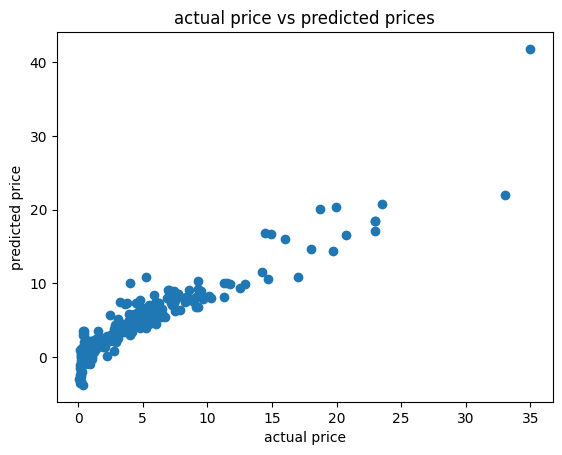

In [23]:
# visualise the actual price and the predicted data
plt.scatter(Y_train,trained_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted prices')
plt.show()

In [24]:
test_data_prediction = lr.predict(X_test)

In [25]:
# x squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("error score :" ,error_score)

error score : 0.8365766715027051


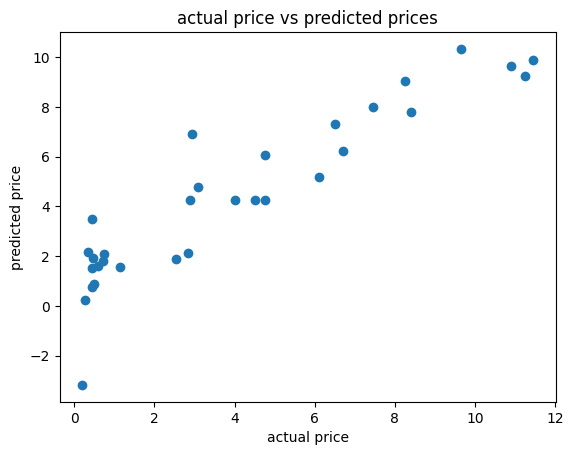

In [26]:
# visualise the actual price and the predicted data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted prices')
plt.show()

In [27]:
laso_regression = Lasso()

In [28]:
#train using lasso
laso_regression.fit(X_train,Y_train)

Lasso()

In [29]:
lasopred = laso_regression.predict(X_train)

In [30]:
# x squared error
error_score = metrics.r2_score(Y_train,lasopred)
print("error score :" ,error_score)

error score : 0.8427856123435794


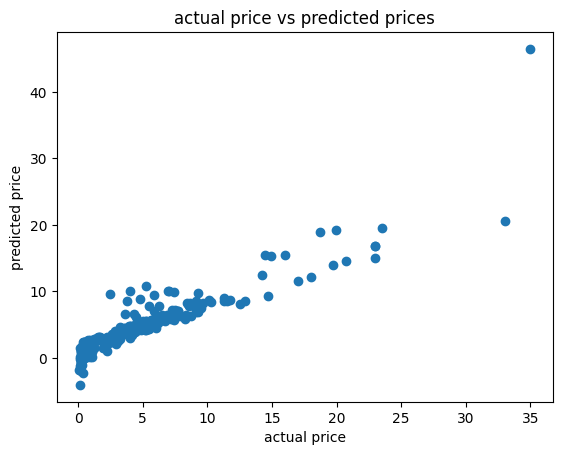

In [32]:
# visualise the actual price and the predicted data
plt.scatter(Y_train,lasopred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted prices')
plt.show()

In [33]:
lasopred = laso_regression.predict(X_test)

In [34]:
# x squared error
error_score = metrics.r2_score(Y_test,lasopred)
print("error score :" ,error_score)

error score : 0.8709167941173195


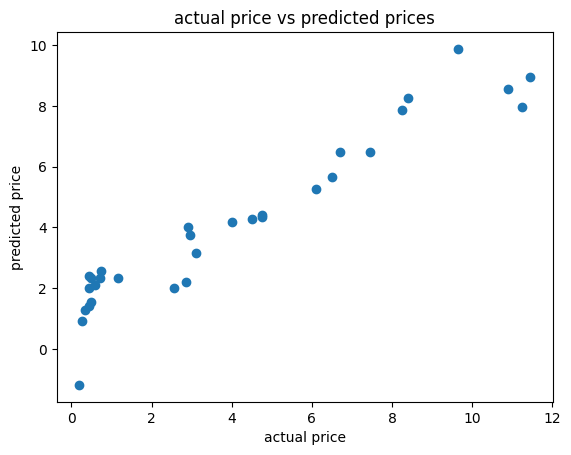

In [35]:
# visualise the actual price and the predicted data
plt.scatter(Y_test,lasopred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted prices')
plt.show()